$$
\textbf{Question 1:}
\\Consider\;a\;network\;with\;single\;hidden\;layer\;with\;tanh\;activation
\\Let\;the\;activation\;of\;output\;layer\;be\;A()
\\tanh(a)=\frac{e^{a}-e^{-a}}{e^{a}+e^{a}}
\\Error\;function(E)=\frac{1}{2}.\sum_{i=1}^{o}(\tilde y_{i}-A(o_{i}))^{2}
\\Lets\;calculate\;the\;derivative\;of\;E\;w.r.t\;weight\;w_{ij}\;the\;weight\;connecting\;i^{th}\;output\;and\;j^{th}\;hidden\;neuron.
\\For\;a\;Stationary\;point\;of\;function(f):\frac{\partial E}{\partial x}=0
\\\frac{\partial E}{\partial w_{ij}}=\frac{\partial}{\partial w_{ij}}(\frac{1}{2}.\sum_{i=1}^{o}(\tilde y_{i}-A(o_{i}))^{2})
\\\frac{\partial E}{\partial w_{ij}}=-(\tilde y-A(o_{i})).A^{'}(o_{i}).\frac{\partial o_{i}}{\partial w_{ij}}
\\=-(\tilde y-A(o_{i})).A^{'}(o_{i}).h_{j}
\\Hidden\;layer\;activations(H)=tanh(W1.X)
\\At\;weight\;space\;origin\;Hidden\;layer\;activations(H)=tanh(0.X)=tanh(0)=0
\\\implies h_{j}=0\;for\;all\;j=0,1,..,h
\\\implies \frac{\partial E}{\partial w_{ij}}=0
\\\implies Every\;weight\;between\;output\;layer\;and\;hidden\;layer\;is\;stationary\;point\;
\\if\;h_{j}=0\;no\;gradients\;are\;passed\;to\;layers\;before\;hidden\;layers
\\\implies\;Partial\;derivatives\;of\;Error\;w.r.t\;all\;the\;other\;weights\;are\;zero\;at\;origin\;in\;weight\;space
\\\therefore The\;origin\;in\;the\;weight\;space\;is\;a\;stationary\;point
\\\blacksquare
$$

$$
\textbf{Question 2(i):}
\\ Given\;error\;function\;E=\frac{1}{2}\lambda_{1}w_{1}^{2}+\frac{1}{2}\lambda_{2}w_{2}^{2}.
\\\implies\;\frac{\partial E}{\partial w_{1}}=\lambda_{1}.w_{1},\frac{\partial E}{\partial w_{2}}=\lambda_{2}.w_{2}
\\\implies\frac{\partial E}{\partial w_{1}.\partial w_{2}}=0
\\\implies \frac{\partial^{2} E}{\partial ^{2} w_{1}}=\lambda_{1}
\\\implies \frac{\partial^{2} E}{\partial ^{2} w_{2}}=\lambda_{2}
\\\implies Consider\;Hessian\;H=\begin{bmatrix} \lambda_{1}&0\\0&\lambda_{2}
\end{bmatrix}
\\Consider\;det(sI-H)=0\implies(s-\lambda_{1}).(s-\lambda_{2})=0
\\\implies Hence\;\lambda_{1}\;and\;\lambda_{2}\;are\;the\;eigen\;values\;of\;Hessian\;matrix.
\\\blacksquare
$$


$$
Importing\;neccessary\;libraries
$$

In [0]:
import numpy as np
import pandas as pd
import csv 
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

$$
Plot\;of\;error\;function(\lambda_{2}:\lambda_{1}=10:1):
$$

Plot of error function:


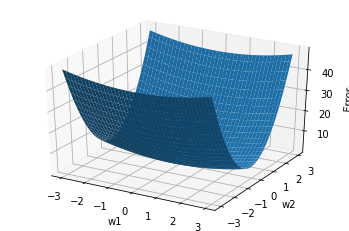

In [0]:
def fun(x, y):
    return 0.5*x**2 + 5*y**2

print("Plot of error function:")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Error')
plt.show()


$$
Function\;for\;performing\;gradient\;descent
$$

In [0]:
def train(w1,w2,l,epochs,lr):
  for i in range(epochs):
    print("epoch %d :error %f"%(i+1,0.5*l*w1**2+5*l*w2**2))
    w1-=lr*l*w1
    w2-=lr*10*l*w2

$$
Applying\;gradient\;descent\;on\;E\;with\;different\;learning\;rates.
$$

In [0]:
def learning_rate(w1,w2,l1,r):
  return 2*(w1**2+(r**2)*w2**2)/(l1*(w1**2+(r**3)*(w2**2)))

In [0]:
l=1
epochs=25
epsilon=0.01
w1=np.random.uniform(0,1)
w2=np.random.uniform(0,1)
print("Maximum learning rate for convergence %f"%learning_rate(w1,w2,1,10))
lr1=learning_rate(w1,w2,1,10)-epsilon*2
print("Initial weights(w1,w2) %f %f:"%(w1,w2))
print("learning_rate= %f"%(lr1))
train(w1,w2,l,epochs,lr1)
print("\n")
lr2=learning_rate(w1,w2,1,10)+epsilon
print("learning_rate=%f"%(lr2))
train(w1,w2,l,epochs,lr2)

Maximum learning rate for convergence 0.200096
Initial weights(w1,w2) 0.169902 0.733942:
learning_rate= 0.180096
epoch 1 :error 2.707789
epoch 2 :error 1.737609
epoch 3 :error 1.115051
epoch 4 :error 0.715555
epoch 5 :error 0.459195
epoch 6 :error 0.294684
epoch 7 :error 0.189114
epoch 8 :error 0.121366
epoch 9 :error 0.077889
epoch 10 :error 0.049988
epoch 11 :error 0.032082
epoch 12 :error 0.020590
epoch 13 :error 0.013215
epoch 14 :error 0.008482
epoch 15 :error 0.005444
epoch 16 :error 0.003494
epoch 17 :error 0.002243
epoch 18 :error 0.001440
epoch 19 :error 0.000924
epoch 20 :error 0.000593
epoch 21 :error 0.000381
epoch 22 :error 0.000244
epoch 23 :error 0.000157
epoch 24 :error 0.000101
epoch 25 :error 0.000065


learning_rate=0.210096
epoch 1 :error 2.707789
epoch 2 :error 3.273684
epoch 3 :error 3.962810
epoch 4 :error 4.800108
epoch 5 :error 5.816259
epoch 6 :error 7.048735
epoch 7 :error 8.543130
epoch 8 :error 10.354823
epoch 9 :error 12.551005
epoch 10 :error 15.213166
ep

$$
\\\textbf{Proof for dependence of largest learning rate for convergence on ratio of eigen values:}
\\Let\;w_{1}\;and\;w_{2}\;be\;the\;initial\;weights.
\\The\;weights\;after\;update\;w_{1}-\eta.\lambda_{1}.w_{1}\;and\;w_{2}-\eta.\lambda_{2}.w_{2}.
\\\implies For\;convergence:
\\\frac{1}{2}\lambda_{1}(w_{1}-\eta.\lambda_{1}.w_{1})^{2}+\frac{1}{2}\lambda_{2}(w_{2}-\eta.\lambda_{2}.w_{2})^{2}\leq\frac{1}{2}.\lambda_{1}.w_{1}^{2}+\frac{1}{2}.\lambda_{2}.w_{2}^{2}
\\\implies \eta (\frac{1}{2}\lambda_{1}^{3}.w_{1}^{2}+\frac{1}{2}\lambda_{2}^{3}.w_{2}^{2})-(\lambda_{1}^{2}.w_{1}^{2}+\lambda_{2}^{2}.w_{2}^{2})=0
\\\eta\leq\frac{\lambda_{1}^{2}.w_{1}^{2}+\lambda_{2}^{2}.w_{2}^{2}}{\frac{1}{2}\lambda_{1}^{3}.w_{1}^{2}+\frac{1}{2}\lambda_{2}^{3}.w_{2}^{2}}
\\\implies The\;largest\;value\;of\;learning\;rate\;for\;which\;the\;error\;function\;converges\;(\eta)<2.\lambda_{1}^{-1}.\frac{w_{1}^{2}+r^{2}.w_{2}^{2}}{w_{1}^{2}+r^{3}.w_{2}^{2}}\;where\;r\;is\;the\;ratio\;of\;eigen\;values(\lambda_{1},\lambda_{2}).
$$

$$
\textbf{Question 3:}
\\Question\;3(i):
$$

$$
Data\;preprocessing:
$$

In [0]:
data = pd.read_csv('train_data.txt', delimiter=',',)
df_train=pd.DataFrame(data)
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
test_data = pd.read_csv('test_data.txt', delimiter=',',)
df_test=pd.DataFrame(test_data)
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


$$
Normalizing\;the\;data
$$

In [0]:
Ytrain_data=df_train['Occupancy'].values
del df_train['Occupancy']
del df_train['date']
Xtrain_data=((df_train-df_train.mean())/np.sqrt(df_train.var())).values
Ytrain_data=torch.tensor(Ytrain_data).float()
Xtrain_data=torch.tensor(Xtrain_data).float()

Ytest_data=df_test['Occupancy'].values
del df_test['Occupancy']
del df_test['date']
Xtest_data=((df_test-df_test.mean())/np.sqrt(df_test.var())).values
Ytest_data=torch.tensor(Ytest_data).float()
Xtest_data=torch.tensor(Xtest_data).float()

$$
Question\;3(a):
$$

$$
Function\;for\;neural\;network\;module
$$

In [0]:
class Multi_layer_perceptron(nn.Module):
  
  
  def __init__(self,input_size,hidden_size1,num_output):
    super(Multi_layer_perceptron,self).__init__()
    self.fc1=nn.Linear(input_size,hidden_size1)
    torch.nn.init.constant_(self.fc1.weight, 1)
    self.sigmoid1=nn.Sigmoid()
    self.fc2=nn.Linear(hidden_size1,num_output)
    torch.nn.init.constant_(self.fc2.weight, 1)
    
  def forward(self,x):
    output=self.fc1(x)
    output=self.sigmoid1(output)
    output=self.fc2(output)
    output=self.sigmoid1(output)
    return output

$$
Function\;for\;calculating\;accuracy:
$$

In [0]:
def prediction_accuracy(targets,network,data):
  predictions=network(data)
  correct=0
  for i in range(predictions.shape[0]):
    if(predictions[i][0]>0.5):
      predictions[i][0]=1
    else:
      predictions[i][0]=0
    
    if(predictions[i][0]==targets[i]):
      correct+=1
  return correct/predictions.shape[0]

$$
Function\;for\;training\;neural\;network
$$

In [0]:
def train(network,X_data,Y_data,learning_rate,epochs
          ,batch_size,loss_show,graph
          ,graph_show,criterion
          ,optimizer,error):
  
  if(optimizer=='SGD'):
    optimizer=optim.SGD(network.parameters(),lr=learning_rate)
  if(optimizer=='Adam'):
    optimizer=optim.Adam(network.parameters(),lr=learning_rate)
    
  if(criterion=='BCE'):
    criterion=nn.BCELoss()
  if(criterion=='MSE'):
    criterion=nn.MSELoss()
  
  train_tensor=torch.utils.data.TensorDataset(X_data,Y_data)
  train_loader=torch.utils.data.DataLoader(dataset=train_tensor
                                           ,batch_size=batch_size
                                           ,shuffle=True)
  loss_list=list()
  error_list=list()
  epoch_list=[(i+1) for i in range(epochs)]
  
  epoch=0
  err=1
  while(epoch<epochs and err>error):
    loss=0
    for(X,Y) in train_loader:
      optimizer.zero_grad()
      y_=network(X)
      loss=criterion(y_,Y)
      loss.backward(loss)
      optimizer.step()
    err=1-prediction_accuracy(Y_data,network,X_data)
    if loss_show==True:
      print("batch:",epoch+1)
      print("loss",loss.item())
      
    if graph_show==True:
      loss_list.append(loss.float()/batch_size)
      error_list.append(err)
    epoch+=1
    
  if(graph_show==True): 
    if(graph==True):
      plt.plot(epoch_list,loss_list,label='loss')
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()
    if(graph==False):
      plt.plot(epoch_list,error_list,label='training_error')
      plt.xlabel("Epochs")
      plt.ylabel("Error")
    
  return(epoch)
 

$$
Training\;the\;network\;with\;small\;learning\;rate
$$

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([8143])) that is different to the input size (torch.Size([8143, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


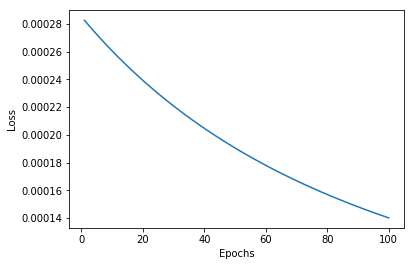

In [0]:
network=Multi_layer_perceptron(np.shape(Xtrain_data)[1],8,1)
e=train(network,Xtrain_data,Ytrain_data
      ,learning_rate=0.01
      ,epochs=100
      ,batch_size=Xtrain_data.shape[0]
      ,loss_show=False
      ,graph=True
      ,graph_show=True
      ,criterion='BCE'
      ,optimizer='SGD'
     ,error=0)

$$
Observation:There\;is\;a\;monotonical\;decrease\;in\;loss\;with\;small\;learning\;rate
$$

$$
Question\;3(b)
$$

$$
Function\;for\;Calculating\;accuracy:
$$

$$
Function\;for\;calculating\;baseline\;error\;and\;accuracy:
$$

In [0]:
def baseline_accuracy(targets):
  random_targets=list()
  for i in range(targets.shape[0]):
    diff=list()
    for j in range(5):
      diff.append(np.random.randint(0,2))
    if(diff.count(0)>diff.count(1)):
      random_targets.append(0)
    else:
      random_targets.append(1)
  
  correct=0
  for i in range(targets.shape[0]):
    if(targets[i]==random_targets[i]):
      correct+=1
  
  targets=torch.tensor(targets).float()
  random_targets=torch.tensor(random_targets).float()
  
  criterion=nn.BCELoss()
  loss=criterion(random_targets,targets)
  
  baseline_accurracy=correct/targets.shape[0]
  baseline_error=loss.item()/targets.shape[0]
  
  return(baseline_accurracy,baseline_error)

In [0]:
(ba_test,be_test)=baseline_accuracy(Ytest_data)
print("Base line accuracy of test data on a scale of 1 is : %f"%ba_test)

Base line accuracy of test data on a scale of 1 is : 0.497949


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


$$
Observation:Baseline\;accuracy\;test\;data\;is\;always\;around\;0.5
$$

$$
Question\;3(c):
$$

$$
Initializing\;a\;network\;with\;H=5\;hidden\;units\;and\;training\;with\;minibatch\;size\;N=100
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


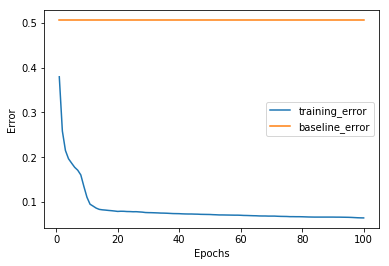

Training_accuracy: 0.935159
Testing_accuracy: 0.917863


In [0]:
network1=Multi_layer_perceptron(np.shape(Xtrain_data)[1],5,1)
train(network1,Xtrain_data,Ytrain_data
      ,learning_rate=0.01
      ,epochs=100
      ,batch_size=100
      ,loss_show=False
      ,graph=False
      ,graph_show=True
      ,criterion='BCE'
      ,optimizer='SGD'
      ,error=0)

(ba,be)=baseline_accuracy(Ytest_data)
baseline_accurracy=[ba for i in range(100)]
epochs=[(i+1) for i in range(100)]

plt.plot(epochs,baseline_accurracy,label='baseline_error')
plt.legend()
plt.show()
print('Training_accuracy: %f'%(prediction_accuracy(Ytrain_data,network1,Xtrain_data)))
print('Testing_accuracy: %f'%(prediction_accuracy(Ytest_data,network1,Xtest_data)))

$$
Question\;3(d):
$$

$$
Initializing\;and\;training\;a\;network\;with\;H=5\;and\;N=Fullbatch
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


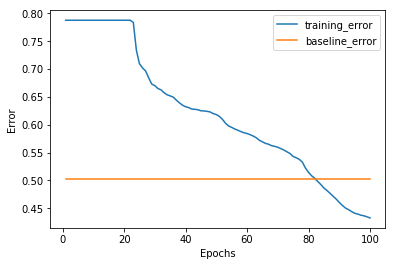

Training_accuracy: 0.567236
Testing_accuracy: 0.419504


In [0]:
network2=Multi_layer_perceptron(np.shape(Xtrain_data)[1],5,1)
train(network2,Xtrain_data,Ytrain_data
      ,learning_rate=0.01
      ,epochs=100
      ,batch_size=Xtrain_data.shape[0]
      ,loss_show=False
      ,graph=False
      ,graph_show=True
      ,criterion='BCE'
      ,optimizer='SGD'
      ,error=0)

(ba,be)=baseline_accuracy(Ytest_data)
baseline_accurracy=[ba for i in range(100)]
epochs=[(i+1) for i in range(100)]

plt.plot(epochs,baseline_accurracy,label='baseline_error')
plt.legend()
plt.show()
print('Training_accuracy: %f'%(prediction_accuracy(Ytrain_data,network2,Xtrain_data)))
print('Testing_accuracy: %f'%(prediction_accuracy(Ytest_data,network2,Xtest_data)))

$$
Obeservations:Minibatch\;is\;able\;to\;acheive\;good\;accuracy\;in\;small\;no\;of\;epochs\;compare\;to\;batch\;training
$$

$$
Question\;3(e):
$$

$$
Training\;the\;networks\;with\;varying\;hidden\;layer\;size(H=1,2,5,10,20)
$$

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([43])) that is different to the input size (torch.Size([43, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


1 th network is trained in 7 epochs:
2 th network is trained in 1 epochs:
3 th network is trained in 2 epochs:
4 th network is trained in 1 epochs:
5 th network is trained in 1 epochs:
hidden layer size: 1 , performance 0.873462
hidden layer size: 2 , performance 0.914889
hidden layer size: 5 , performance 0.912428
hidden layer size: 10 , performance 0.887818
hidden layer size: 20 , performance 0.904020


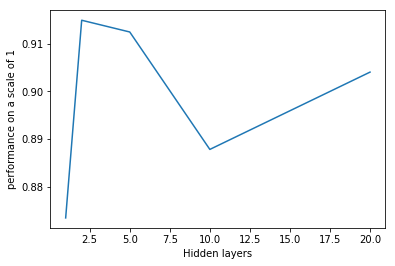

In [0]:
H=[1,2,5,10,20]
performance_test=list()
epochs=list()
for i in range(len(H)):
  network_1=Multi_layer_perceptron(np.shape(Xtrain_data)[1],H[i],1)
  e=train(network_1,Xtrain_data,Ytrain_data
        ,learning_rate=0.1
        ,epochs=100
        ,batch_size=100
        ,loss_show=False
        ,graph=False
        ,graph_show=False
        ,criterion='BCE'
        ,optimizer='SGD'
        ,error=0.1)
  
  epochs.append(e)
  performance_test.append(prediction_accuracy(Ytest_data
                                              ,network_1
                                              ,Xtest_data))
  print("%d th network is trained in %d epochs:"%(i+1,e))
  
for i in range(len(H)):
  print("hidden layer size: %d , performance %f"%(H[i],performance_test[i]))
plt.plot(H,performance_test)
plt.xlabel("Hidden layers")
plt.ylabel("performance on a scale of 1")
plt.show()


$$
\\The\;stopping\;condition\;for\;training\;the\;network\;is\;accuracy>90\%\;on\;train\;accuarcy
\\Observations:Network\;with\;hidden\;layer\;sizes=2,5\;able\;generalize\;the\;data\;well\;compare\;to\;other\;hidden\;layer\;sizes
$$

$$
Question\;3(f):
$$

$$
All\;the\;above\;graphs\;with\;RMSE\;loss
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


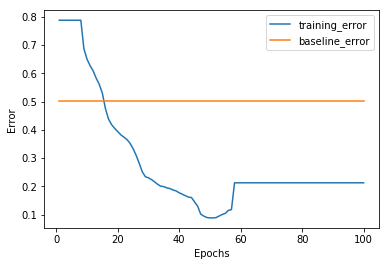

Training_accuracy: 0.787670
Testing_accuracy: 0.789889


In [0]:
network1=Multi_layer_perceptron(np.shape(Xtrain_data)[1],5,1)
train(network1,Xtrain_data,Ytrain_data
      ,learning_rate=0.01
      ,epochs=100
      ,batch_size=100
      ,loss_show=False
      ,graph=False
      ,graph_show=True
      ,criterion='MSE'
      ,optimizer='SGD'
      ,error=0)

(ba,be)=baseline_accuracy(Ytest_data)
baseline_accurracy=[ba for i in range(100)]
epochs=[(i+1) for i in range(100)]

plt.plot(epochs,baseline_accurracy,label='baseline_error')
plt.legend()
plt.show()
print('Training_accuracy: %f'%(prediction_accuracy(Ytrain_data,network1,Xtrain_data)))
print('Testing_accuracy: %f'%(prediction_accuracy(Ytest_data,network1,Xtest_data)))

$$
Training\;network\;with\;H=5\;and\;RMSE\;loss
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


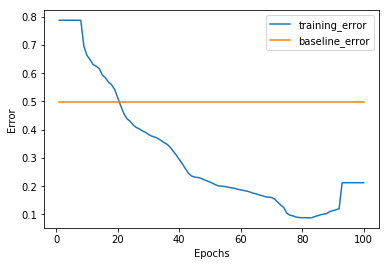

training_accuracy:0.7876703917475132
testing_accuracy:0.7898892534864643


In [0]:
network2=Multi_layer_perceptron(np.shape(Xtrain_data)[1],5,1)
train(network2,Xtrain_data,Ytrain_data
      ,learning_rate=0.5
      ,epochs=100
      ,batch_size=Xtrain_data.shape[0]
      ,loss_show=False
      ,graph=False
      ,graph_show=True
      ,criterion='MSE'
      ,optimizer='SGD'
      ,error=0)

(ba,be)=baseline_accuracy(Ytest_data)
baseline_accurracy=[ba for i in range(100)]
epochs=[(i+1) for i in range(100)]

plt.plot(epochs,baseline_accurracy,label='baseline_error')
plt.legend()
plt.show()
print('training_accuracy:',end="")
print(prediction_accuracy(Ytrain_data,network2,Xtrain_data))
print('testing_accuracy:',end="")
print(prediction_accuracy(Ytest_data,network2,Xtest_data))

1 th network is trained in 100 epochs:
2 th network is trained in 3 epochs:
3 th network is trained in 5 epochs:
4 th network is trained in 10 epochs:
5 th network is trained in 23 epochs:
hidden layer size: 1 , performance 0.789889
hidden layer size: 2 , performance 0.908224
hidden layer size: 5 , performance 0.911095
hidden layer size: 10 , performance 0.900943
hidden layer size: 20 , performance 0.913966


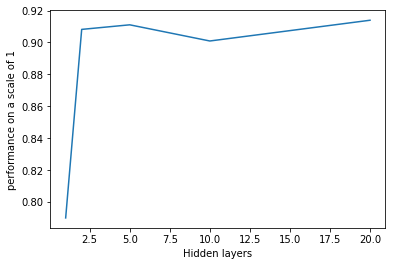

In [0]:
H=[1,2,5,10,20]
performance_test=list()
epochs=list()
for i in range(len(H)):
  network_1=Multi_layer_perceptron(np.shape(Xtrain_data)[1],H[i],1)
  e=train(network_1,Xtrain_data,Ytrain_data
        ,learning_rate=0.1
        ,epochs=100
        ,batch_size=100
        ,loss_show=False
        ,graph=False
        ,graph_show=False
        ,criterion='MSE'
        ,optimizer='SGD'
        ,error=0.1)
  
  epochs.append(e)
  performance_test.append(prediction_accuracy(Ytest_data
                                              ,network_1
                                              ,Xtest_data))
  print("%d th network is trained in %d epochs:"%(i+1,e))
  
for i in range(len(H)):
  print("hidden layer size: %d , performance %f"%(H[i],performance_test[i]))
plt.plot(H,performance_test)
plt.xlabel("Hidden layers")
plt.ylabel("performance on a scale of 1")
plt.show()


$$
\\Observations:\implies The\;maximum\;accuracy\;achieved\;using\;RMSE\;loss\;is\;less\;than\;that\;of\;binary\;cross\;entropy.
\\\implies Minibatch\;is\;acheiving\;better\;accuracy\;than\;Full\;batch\;in\;less\;number\;of\;epochs.
\\\implies If\;the\;network\;with\;RMSELoss\;is\;trained\;for\;more\;epochs\;the\;model\;is\;overfitting\;resulting\;in\;less\;test\;accuracy.
\\The\;stopping\;condition\;for\;training\;the\;network\;is\;accuracy>90\%\;on\;train\;accuarcy
\\\implies In\;most\;of\;the\;cases\;the\;model\;is\;acheiving\;better\;accuracy\;with\;hidden\;layer\;sizes=2,5\;compared\;to\;size=\;1,10,20,which\;is\;same\;as\;model\;with\;BCE\;loss
$$

$$
Question\;3(g):
$$

$$
Function\;for\;MLP\;with\;two\;hidden\;layers
$$

In [0]:
class Multi_layer_perceptron1(nn.Module):
  
  
  def __init__(self,input_size,hidden_size1,hidden_size2,num_output):
    super(Multi_layer_perceptron1,self).__init__()
    self.fc1=nn.Linear(input_size,hidden_size1)
    torch.nn.init.constant_(self.fc1.weight, 1)
    self.sigmoid1=nn.Sigmoid()
    self.fc2=nn.Linear(hidden_size1,hidden_size2)
    torch.nn.init.constant_(self.fc2.weight, 1)
    self.fc3=nn.Linear(hidden_size2,num_output)
    torch.nn.init.constant_(self.fc3.weight, 1)
    
  def forward(self,x):
    output=self.fc1(x)
    output=self.sigmoid1(output)
    output=self.fc2(output)
    output=self.sigmoid1(output)
    output=self.fc3(output)
    output=self.sigmoid1(output)
    return output

$$
Training\;on\;network(5,2,2,1)\;on\;the\;data
$$

In [0]:
double_network=Multi_layer_perceptron1(np.shape(Xtrain_data)[1],2,2,1)
e=train(double_network,Xtrain_data,Ytrain_data
        ,learning_rate=0.5
        ,epochs=100
        ,batch_size=100
        ,loss_show=False
        ,graph=False
        ,graph_show=False
        ,criterion='BCE'
        ,optimizer='SGD'
        ,error=0.1)
print("Network training completed in %d epochs"%(e))
print("Accuracy on Test data %f"%(prediction_accuracy(Ytest_data
                                                      ,double_network
                                                      ,Xtest_data)))

Network training completed in 5 epochs
Accuracy on Test data 0.920529


In [0]:
double_network1=Multi_layer_perceptron1(np.shape(Xtrain_data)[1],4,2,1)
e=train(double_network1,Xtrain_data,Ytrain_data
        ,learning_rate=0.5
        ,epochs=100
        ,batch_size=100
        ,loss_show=False
        ,graph=False
        ,graph_show=False
        ,criterion='BCE'
        ,optimizer='SGD'
        ,error=0.1)

print("Network training completed in %d epochs"%(e))
print("Accuracy on Test data %f"%(prediction_accuracy(Ytest_data
                                                      ,double_network1
                                                      ,Xtest_data)))

Network training completed in 4 epochs
Accuracy on Test data 0.883203


$$
\\I\;tried\;architectures(5,2,2,1)\;and(5,4,2,1).
\\Observations:Architecture(5,2,2,1)\;outperformed\;all\;the\;single\;layer\;networks.
$$